In [1]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter13_Apriori'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter13_Apriori


In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [3]:
# sử dụng list để lưu danh sách các mục
dataset = [['Eggs', 'Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Orange', 'Corn', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Orange', 'Eggs'], 
           ['Corn', 'Coke', 'Kidney Beans', 'Ice cream'],
           ['Dill', 'Onion', 'Nutmeg'],
           ['Coke', 'Apple', 'Ice cream']
          ]

In [4]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Coke,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Orange,Unicorn,Yogurt
0,False,False,False,False,True,False,True,True,True,True,False,False,True
1,False,False,False,True,True,False,False,False,True,True,False,False,True
2,True,False,False,False,True,False,True,True,False,False,False,False,False
3,False,False,True,False,False,False,True,True,False,False,False,True,True
4,False,False,True,False,True,True,True,False,False,True,False,False,False
5,False,False,True,False,True,False,False,False,False,False,True,False,True
6,True,False,False,False,True,False,False,True,False,False,True,False,False
7,False,True,True,False,False,True,True,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,True,True,False,False,False
9,True,True,False,False,False,True,False,False,False,False,False,False,False


In [5]:
frequent_itemsets = apriori(df, min_support = 0.3, use_colnames = True) # dặt ngưỡng dựa trên số transaction
print(frequent_itemsets)

    support              itemsets
0       0.3               (Apple)
1       0.4                (Corn)
2       0.6                (Eggs)
3       0.3           (Ice cream)
4       0.5        (Kidney Beans)
5       0.4                (Milk)
6       0.3              (Nutmeg)
7       0.4               (Onion)
8       0.4              (Yogurt)
9       0.3  (Corn, Kidney Beans)
10      0.3  (Kidney Beans, Eggs)
11      0.3          (Eggs, Milk)
12      0.3         (Eggs, Onion)
13      0.3        (Eggs, Yogurt)
14      0.3  (Kidney Beans, Milk)
15      0.3       (Nutmeg, Onion)


In [7]:
from mlxtend.frequent_patterns import association_rules
association_rules (frequent_itemsets, metric = 'confidence', min_threshold = 0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Kidney Beans),0.4,0.5,0.3,0.75,1.50,0.10,2.0
1,(Kidney Beans),(Corn),0.5,0.4,0.3,0.60,1.50,0.10,1.5
2,(Kidney Beans),(Eggs),0.5,0.6,0.3,0.60,1.00,0.00,1.0
3,(Eggs),(Kidney Beans),0.6,0.5,0.3,0.50,1.00,0.00,1.0
4,(Eggs),(Milk),0.6,0.4,0.3,0.50,1.25,0.06,1.2
5,(Milk),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6
6,(Eggs),(Onion),0.6,0.4,0.3,0.50,1.25,0.06,1.2
7,(Onion),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6
8,(Eggs),(Yogurt),0.6,0.4,0.3,0.50,1.25,0.06,1.2
9,(Yogurt),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6


In [9]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold= 1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Kidney Beans),0.4,0.5,0.3,0.75,1.5,0.10,2.0
1,(Kidney Beans),(Corn),0.5,0.4,0.3,0.60,1.5,0.10,1.5
2,(Kidney Beans),(Milk),0.5,0.4,0.3,0.60,1.5,0.10,1.5
3,(Milk),(Kidney Beans),0.4,0.5,0.3,0.75,1.5,0.10,2.0
4,(Nutmeg),(Onion),0.3,0.4,0.3,1.00,2.5,0.18,inf
5,(Onion),(Nutmeg),0.4,0.3,0.3,0.75,2.5,0.18,2.8


In [12]:
# Có milk ko? nó kết hợp với item nào ko?
for row in rules.iterrows():
  if "Milk" in row[1][0]:
    print(row)

(3, antecedents                   (Milk)
consequents           (Kidney Beans)
antecedent support               0.4
consequent support               0.5
support                          0.3
confidence                      0.75
lift                             1.5
leverage                         0.1
conviction                         2
Name: 3, dtype: object)


In [13]:
support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'confidence')

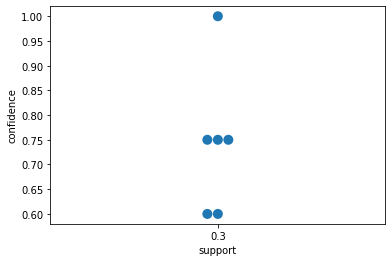

In [15]:
sns.swarmplot(x = support, y = confidence, size = 10)
plt.xlabel('support')
plt.ylabel('confidence')